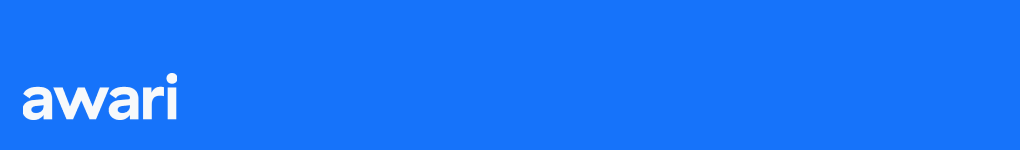

Prática da **Aula 04: Linguagem Python II**, do curso de **Data Science** da **[Awari](https://awari.com.br/)**. Para utilizá-la, vá no menu "Arquivo" e, em seguida, na opção "Salvar uma cópia no Drive". Isto criará uma cópia deste notebook em uma pasta chamada "Colab Notebooks", no seu Google Drive pessoal. Use a cópia para criar novas células de código ou executar as células desta prática.

---

# **Manipulação com Pandas**

## **Objetivo**

Nesta prática, vamos aprender a criar **DataFrames** (algo parecido com "tabelas" de dados) e a manipular dados com uma das principais e mais utilidas bibliotecas de Data Science, chamada **Pandas**.

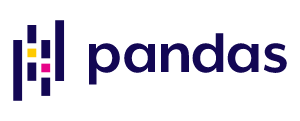

O nome é derivado do termo inglês *panel data* (dados em painel), um termo usado em Estatística e Econometria para conjuntos de dados que incluem várias unidades amostrais (indivíduos, empresas etc.), acompanhadas ao longo do tempo.

Características de Pandas:
- Uso do objeto "DataFrame" para manipulação de dados, com indexação integrada.
- Ferramentas para ler e escrever dados entre diferentes estruturas de dados e formatos de arquivo.
- Alinhamento de dados e manipulação de dados ausentes.
- Reformatação e pivoteamento de matrizes (dados).
- Divisão (slicing), fancy indexing, e subsettingde grandes conjuntos de dados.
- Inserir e deletar colunas em conjuntos de dados.
- Ferramentas para fundir(merging) ou juntar(join) conjuntos de dados.
- Funcionalide para séries temporais (time series): Geração de intervalo de datas(date range) e conversão de frequência, estatística móvel, regressão linear, entre outras.
- Filtragem e limpeza de dados.

Documentação: https://pandas.pydata.org/

## **Prática**

Sem perder tempo, vamos ver mais de perto como Pandas funciona.

### **Importando as bibliotecas**

Importaremos Pandas e Numpy. As duas costumam aparecer muito juntas, já que se complementam em suas funcionalidades.

In [32]:
import pandas as pd
import numpy as np

### **Series**

Pense em uma *Serie* como uma lista.

 #### **Criando a partir de uma lista**

In [9]:
data = [4, 7, -5, 3, 5]
index = ['d', 'b', 'a', 'c', 'e']

s = pd.Series(data, index=index)
s

,0
d,4
b,7
a,-5
c,3
e,5


In [11]:
s.dtype

dtype('int64')

In [12]:
pd.Series(data)

,0
0,4
1,7
2,-5
3,3
4,5


 #### **Criando a partir de um Numpy array**

In [39]:
data = np.random.randn(5)
index = ["a", "b", "c", "d", "e"]


s = pd.Series(data, index=index)
s


,0
a,-0.658029
b,0.179203
c,-1.248827
d,1.191425
e,0.175787


 #### **Criando a partir de um dicionário**



In [ ]:
data = {"a": 0.0, "b": 1.0, "c": 2.0}

s = pd.Series(data)
s

#### **Criando a partir de um dicionário com índice especificado**

In [41]:
data = {'z': 1, 'b': 2, 'c': 3}
s = pd.Series(data, index=['a', 'z', 'c'])
s

,0
a,NaN
z,1.0
c,3.0


As chaves do dicionário correspondem aos valores do Índice, portanto, os valores do Índice não têm efeito.


#### **Criando a partir de um dicionário com índice modificado (valores iguais às chaves)**


In [ ]:
data = {'a': 1, 'b': 2, 'c': 3}

s = pd.Series(data, index=['c', 'a', 'b'])
s

O indice é construido com as chaves do dicionário depois reindexado com os valores do índice fornecido.

#### **Criando a partir de um dicionário com índice modificado (valores diferentes das chaves)**

In [ ]:
data = {'a': 1, 'b': 2, 'c': 3}

s = pd.Series(data, index=['x', 'y', 'z'])
s

Observe que o índice é construído primeiro com as chaves do dicionário. Depois disso, a série é reindexada com os valores de índice fornecidos, portanto, obtemos todos os NaN como resultado.

### **DataFrames**

- *DataFrame* é uma estrutura de dados rotulada bidimensional.
- Possui colunas de tipos potencialmente diferentes.
- Você pode pensar nisso como uma planilha ou tabela SQL, ou um dicionário de objetos Series.
- Geralmente é o objeto de pandas mais comumente usado.
- Permite arranjo da coleção de dados e cálculos estatísticos

#### **Criando a partir de um dicionário**

In [42]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


#### **Criando a partir de um dicionário (modificando o índice)**

In [46]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}

pd.DataFrame(d, index=["a", "k", "c", "d"])

,one,two
a,1.0,4.0
k,2.0,3.0
c,3.0,2.0
d,4.0,1.0


#### **Criando a partir de uma lista de dicionários**

In [44]:
dados = [
    {'Nome': 'Jetta Variant', 'Motor': 'Motor 4.0 Turbo', 'Ano': 2003, 'Quilometragem': 44410.0, 'Zero_km': False, 'Valor': 88078.64},
    {'Nome': 'Passat', 'Motor': 'Motor Diesel', 'Ano': 1991, 'Quilometragem': 5712.0, 'Zero_km': False, 'Valor': 106161.94},
    {'Nome': 'Crossfox', 'Motor': 'Motor Diesel V8', 'Ano': 1990, 'Quilometragem': 37123.0, 'Zero_km': False, 'Valor': 72832.16},
]

In [45]:
pd.DataFrame(dados)

,Nome,Motor,Ano,Quilometragem,Zero_km,Valor
0,Jetta Variant,Motor 4.0 Turbo,2003,44410.0,False,88078.64
1,Passat,Motor Diesel,1991,5712.0,False,106161.94
2,Crossfox,Motor Diesel V8,1990,37123.0,False,72832.16


#### **Lendo e exportando bases_de_dados**

Lendo arquivos CSV:

In [ ]:
df = pd.read_csv('nomes.csv')
df

Exportando DataFrames para CSV:

In [ ]:
df.to_csv('exportando.csv')

Lendo arquivos JSON:

In [ ]:
df = pd.read_json('nomes.json')
df

Exportando DataFrames para JSON:

In [ ]:
df.to_html('exportando.html')

Lendo arquivos HTML:

In [ ]:
df = pd.read_html('nomes.html')
df[0]

Exportando DataFrames para HTML:


In [ ]:
df.to_html('exportando.html')

Lendo arquivos EXCEL

In [ ]:
df = pd.read_excel('nomes.xlsx')
df

Exportando DataFrames para EXCEL:

In [ ]:
df.to_excel('exportando.xlsx')

Lendo arquivos CSV direto do Github via url:

In [ ]:
dados = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'

df = pd.read_csv(dados)
df

### **Analisando um dataset com Pandas**

Vamos analisar o conjunto de dados do Titanic, que importamos acima.

In [ ]:
# Quantidade total de linhas
df.count()

In [ ]:
# Formato do dataframe: indica a quantidade de linhas e colunas
df.shape

In [ ]:
# Visualizando as primeiras 10 linhas
df.head(10)

In [ ]:
# Visualizando as últimas 10 linhas
df.tail(10)

In [ ]:
# Obtendo informações sobre as colunas do dataset
df.info()

In [ ]:
# Efetuando contagens de linhas
df.count()

In [ ]:
# Obtendo estatísticas das colunas (somente para colunas numéricas)
df.describe()

In [ ]:
# Deletando uma coluna do dataset
df.drop(columns = ["Cabin"], inplace = True)

In [ ]:
# Verificando que a coluna foi deletada
df.head(5)

In [ ]:
# Sorteando os dados do dataframe
df.sort_values("Name") #sorteando a coluna nome em ordem alfabética

In [ ]:
# Renomeando uma coluna
df.rename(columns = {"Age":"Idade"}, inplace = True)

In [ ]:
df.head(5)

In [ ]:
# Filtrando dados do dataframe
df[df.Parch > 0]

### **Continue aprendendo**

Caso tenha tempo, tente acompanhar:

- os [tutorais da documentação do Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html).
- o [mini-curso do Kaggle sobre Pandas](https://www.kaggle.com/learn/pandas).


---

Notebook utilizado para fins educacionais da **Awari**.

**© AWARI. Todos os direitos reservados.**